In [1]:
import scipy.cluster.hierarchy as sch
import numpy as np
import sympy as sp
sp.init_printing(use_latex=True)
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Times New Roman + SimSun + WFM Sans SC']
plt.rcParams['mathtext.fontset']='stix'
# Times New Roman + SimSun + WFM Sans SC
# simsum宋体, times new roman -*, simhei黑体, kaiti楷体, 
# dengxian等线, fangsong仿宋, Microsoft Yahei微软雅黑
plt.rcParams['axes.unicode_minus']=False   
plt.rcParams['figure.dpi'] = 200
# plt.rcParams['figure.figsize'] = [4, 3]
# plt.rcParams['font.size'] = 12
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'

### 1
(1) 系统聚类（最长距离法）

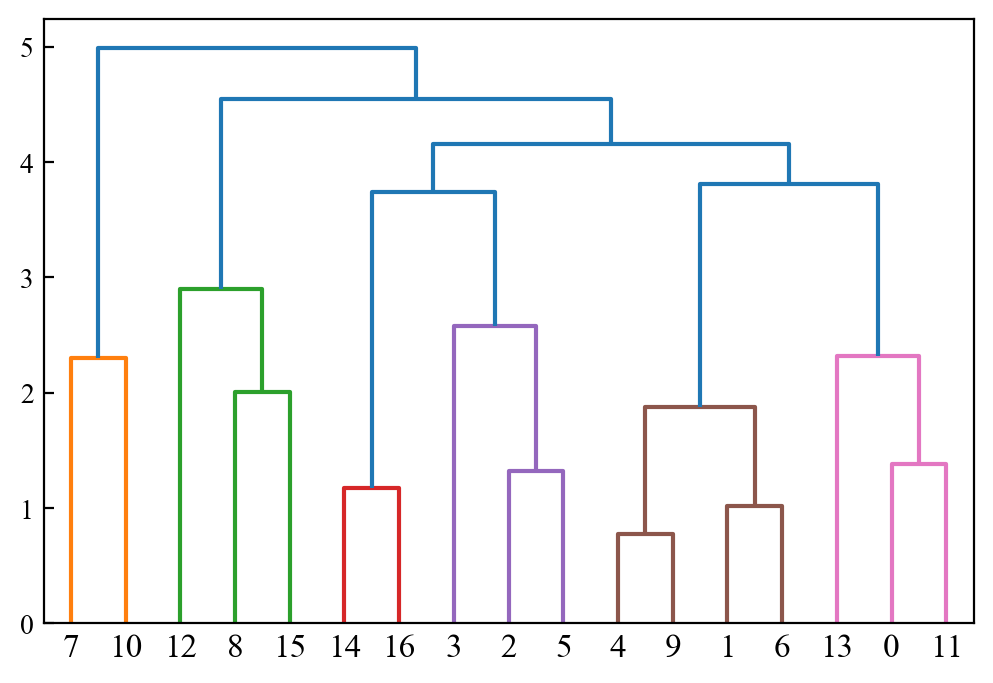

In [2]:
data = np.loadtxt('../../../hw/11第11章  聚类分析与判别分析习题解答/ti11_1.txt')
ran = data.ptp(axis=0)
_min = data.min(axis=0)
B = (data - _min)/ran

c = sch.linkage(B, method='complete', metric='mahalanobis')
sch.dendrogram(c)
plt.show()

(2) 动态聚类（$K$ 均值聚类）

1．肘部法则

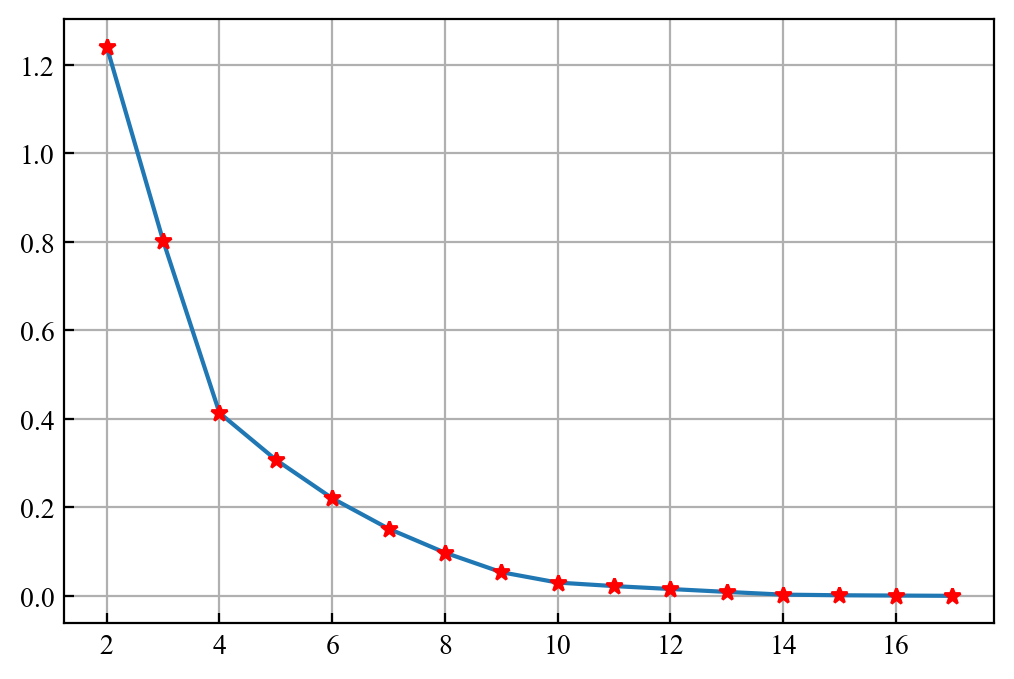

In [3]:
from sklearn.cluster import KMeans

SSE = []
K = range(2, len(B)+1)
for k in K:
    md = KMeans(k).fit(B)
    SSE.append(md.inertia_)
plt.plot(K, SSE, '-*', markerfacecolor='r', markeredgecolor='r')
plt.grid()
plt.show()

2．轮廓系数

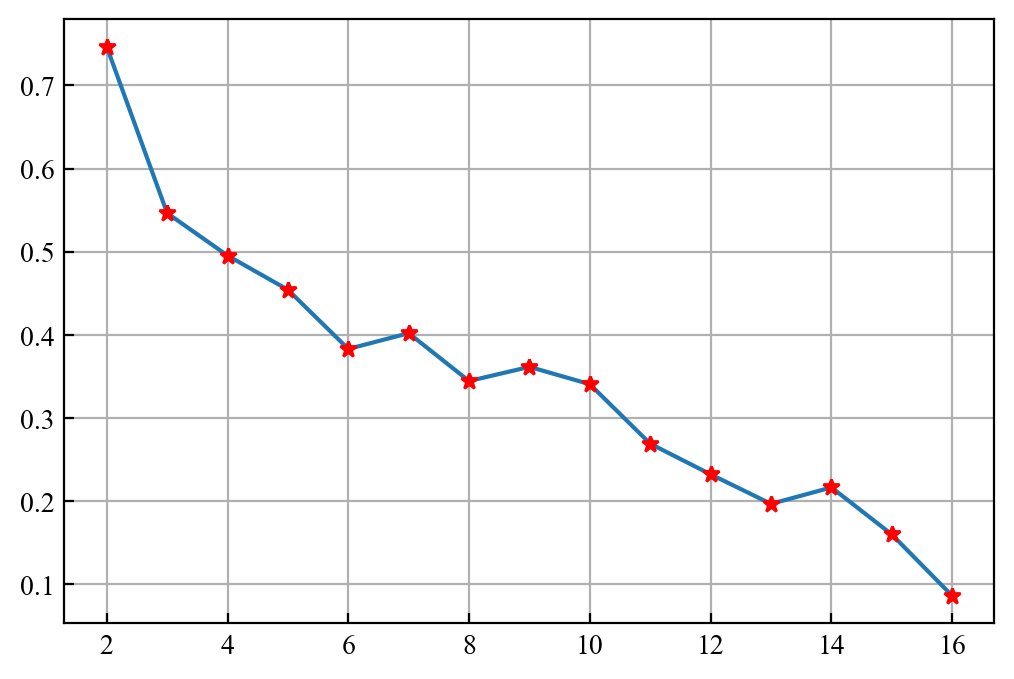

In [4]:
from sklearn.metrics import silhouette_score

S = []
K = range(2, len(B))
for i in K:
    md = KMeans(i).fit(B)
    labels = md.labels_
    S.append(silhouette_score(B, labels))

plt.plot(K, S, '-*', markerfacecolor='r', markeredgecolor='r')
plt.grid()
plt.show()

最终选择聚为 4 类

In [5]:
md4 = KMeans(4).fit(B)
labels = md4.labels_ + 1
print(labels)

[3 3 1 1 3 1 3 1 2 3 3 3 2 3 2 2 4]


### 2

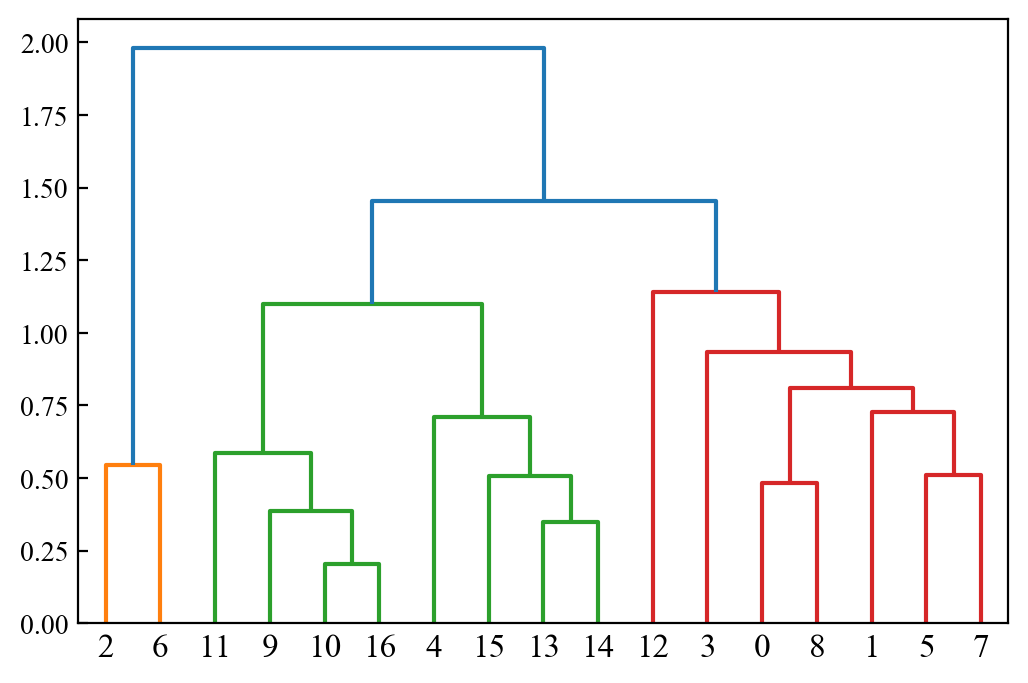

In [6]:
data = np.loadtxt('../../../hw/11第11章  聚类分析与判别分析习题解答/ti11_2.txt')
ran = data.ptp(axis=0)
_min = data.min(axis=0)
B = (data - _min)/ran
c = sch.linkage(B, method='complete', metric='euclidean')
sch.dendrogram(c)
plt.show()

In [7]:
from scipy.cluster.hierarchy import fcluster

print(fcluster(c, 3, criterion='maxclust'))

[3 3 1 3 2 3 1 3 3 2 2 2 3 2 2 2 2]


### 3

In [8]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import cross_val_score as cvs

data = np.loadtxt('../../../hw/11第11章  聚类分析与判别分析习题解答/ti11_3.txt')
B = zscore(data)
x0 = B[:8]          # 行为样本，列为变量
y0 = np.hstack([np.ones(3), 2*np.ones(5)])
x = B[8:]

md_dis = KNC().fit(x0,y0)  #构造并拟合欧氏距离模型x
pre_dis = md_dis.predict(x)   #预测待判样本
print('分类结果:', pre_dis)
print('回代误判率：', 1 - md_dis.score(x0,y0))   # 回代误判率  
print('交叉误判率：',1 - cvs(KNC(), x0, y0, cv=3))  # 计算3折交叉误判率

分类结果: [2. 2. 1.]
回代误判率： 0.125
交叉误判率： [0.33333333 0.33333333 0.5       ]


In [9]:
md_fisher = LDA().fit(x0,y0)  #构造并拟合Fisher线性模型
pre3 = md_fisher.predict(x)   #预测待判样本
print('分类结果：', pre3)
print('回代误判率：', 1 - md_fisher.score(x0, y0))
print('交叉误判率：', 1 - cvs(LDA(), x0, y0, cv=3))  #计算3折交叉误判率

分类结果： [1. 1. 1.]
回代误判率： 0.0
交叉误判率： [0.33333333 0.66666667 0.5       ]


### 4

In [10]:
data = np.loadtxt('../../../hw/11第11章  聚类分析与判别分析习题解答/ti11_4.txt')
x0 = data
y0 = np.hstack([np.ones(5), np.ones(3)*2])

md = LDA().fit(x0, y0)
pred = md.predict(x0)
print(pred)
print("回代误判率：", '{:.2%}'.format(1 - md.score(x0, y0)))

[1. 1. 1. 1. 1. 2. 2. 2.]
回代误判率： 0.00%


### 5

In [11]:
import pandas as pd

df = pd.read_excel('../../../hw/11第11章  聚类分析与判别分析习题解答/ti11_5.xlsx', header=None)
x0 = df.iloc[:19, :4]
y0 = df.iloc[:19, 4].astype(float)
x = df.iloc[19:, :4]

md = KNC().fit(x0, y0)
pred = md.predict(x)
pred

array([3., 1., 1.])

In [12]:
print('回代误判率：', 1 - md.score(x0, y0))
print('交叉误判率：', 1 - cvs(KNC(), x0, y0, cv=4))

回代误判率： 0.10526315789473684
交叉误判率： [0.2  0.   0.2  0.25]


In [13]:
md_dis = LDA().fit(x0, y0)
pred = md_dis.predict(x)
print(pred)
print('回代误判率：', 1 - md_dis.score(x0, y0))
print('交叉误判率：', 1 - cvs(KNC(), x0, y0, cv=4))

[3. 1. 1.]
回代误判率： 0.0
交叉误判率： [0.2  0.   0.2  0.25]
